In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Getting familiar with the data

In [2]:
SALARY_DATA_PATH = "./data/Cleaned_Dataset.csv"

In [3]:
# Load data
df = pd.read_csv(SALARY_DATA_PATH)
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5341 entries, 0 to 5340
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   work_year             5341 non-null   int64 
 1   job_title             5341 non-null   object
 2   job_category          5341 non-null   object
 3   salary_currency       5341 non-null   object
 4   salary                5341 non-null   int64 
 5   salary_in_usd         5341 non-null   int64 
 6   employee_residence    5341 non-null   object
 7   experience_level      5341 non-null   object
 8   employment_type       5341 non-null   object
 9   work_setting          5341 non-null   object
 10  company_location      5341 non-null   object
 11  company_size          5341 non-null   object
 12  experience_level_cat  5341 non-null   int64 
dtypes: int64(4), object(9)
memory usage: 542.6+ KB


In [15]:
df.describe()

,work_year,salary,salary_in_usd,experience_level_cat
count,5341.000000,5341.000000,5341.000000,5341.000000
mean,2022.682082,145814.937839,146258.409099,1.653436
std,0.608026,67025.469452,66594.117529,0.678110
min,2020.000000,14000.000000,15000.000000,0.000000
25%,2022.000000,97300.000000,98506.000000,1.000000
50%,2023.000000,140000.000000,140000.000000,2.000000
75%,2023.000000,186200.000000,186000.000000,2.000000
max,2023.000000,450000.000000,450000.000000,3.000000


In [4]:
for col in ['job_title', 'job_category', 'salary_currency', 'employee_residence', 'experience_level', 'employment_type', 'work_setting', 'company_location', 'company_size']:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].unique())  
    print("-" * 40)


job_title: 125 unique values
['Data DevOps Engineer' 'Data Architect' 'Data Scientist'
 'Machine Learning Researcher' 'Data Engineer' 'Machine Learning Engineer'
 'Data Analyst' 'Analytics Engineer' 'Applied Scientist' 'BI Developer'
 'Business Intelligence Engineer' 'Research Scientist' 'Research Analyst'
 'Research Engineer' 'Data Science Engineer' 'Data Quality Analyst'
 'Data Product Manager' 'Machine Learning Scientist' 'AI Engineer'
 'MLOps Engineer' 'Deep Learning Engineer' 'Data Modeler'
 'Data Product Owner' 'Data Science Consultant'
 'Business Intelligence Analyst' 'AI Developer' 'Data Manager'
 'ML Engineer' 'Data Science Director' 'Head of Data' 'BI Analyst'
 'Data Management Analyst' 'Machine Learning Modeler' 'Data Specialist'
 'BI Data Analyst' 'Data Integration Engineer'
 'Business Intelligence Manager' 'Data Integration Specialist'
 'Data Science Practitioner' 'Business Intelligence Developer'
 'AI Research Engineer' 'Data Lead' 'Data Management Specialist'
 'AI Archit

### Salary distribution

/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


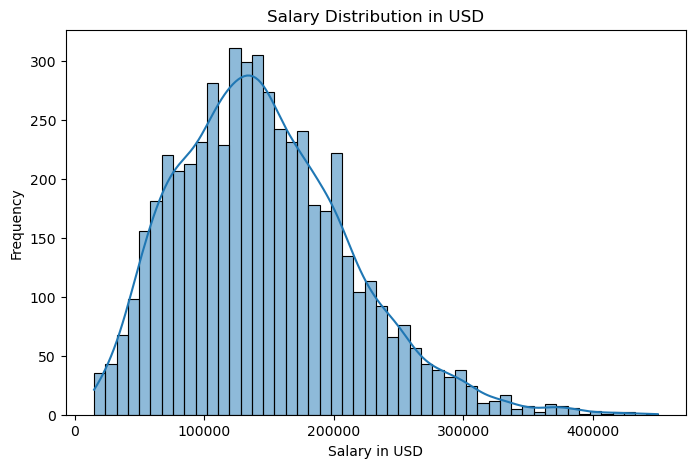

In [5]:
# Plot salary distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['salary_in_usd'], bins=50, kde=True)
plt.title("Salary Distribution in USD")
plt.xlabel("Salary in USD")
plt.ylabel("Frequency")
plt.show()


### Jobs category study

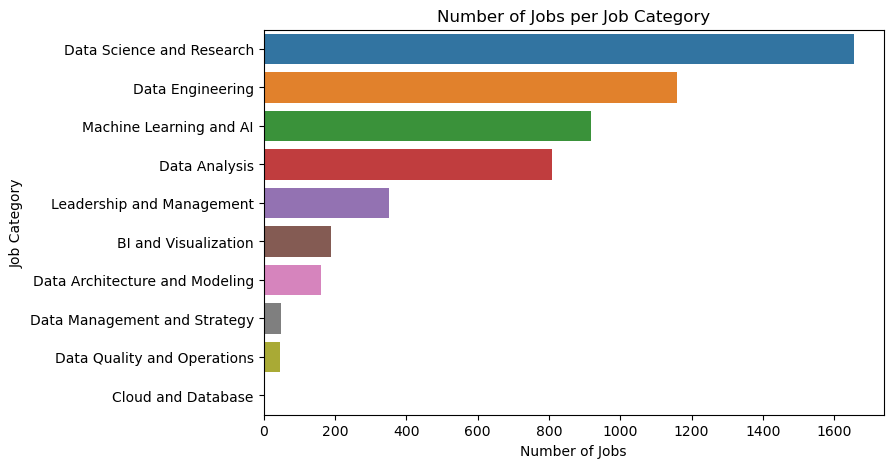

In [6]:
# Plot the number of jobs per job category
plt.figure(figsize=(8, 5))
sns.countplot(y='job_category', data=df, order = df['job_category'].value_counts().index)
plt.title("Number of Jobs per Job Category")
plt.xlabel("Number of Jobs")
plt.ylabel("Job Category")
plt.show()

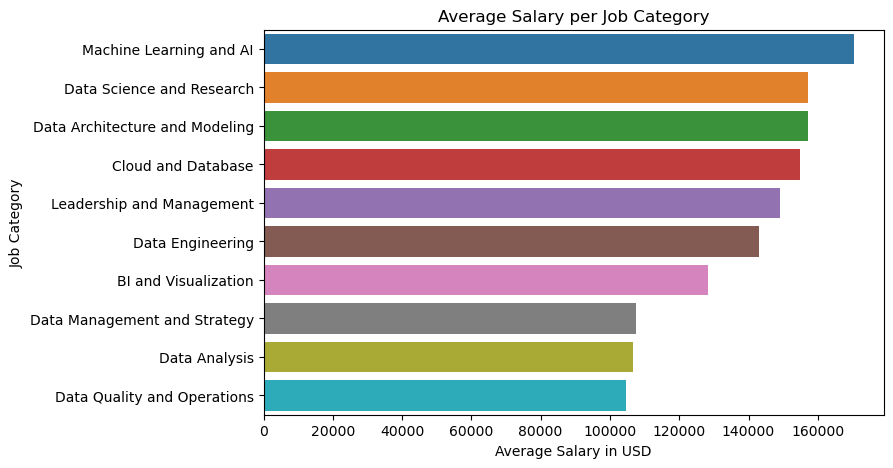

In [7]:
# Compute average salary per job category
avg_salary_per_job_category = df.groupby('job_category')['salary_in_usd'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_salary_per_job_category, y=avg_salary_per_job_category.index)
plt.title("Average Salary per Job Category")
plt.xlabel("Average Salary in USD")
plt.ylabel("Job Category")
plt.show()


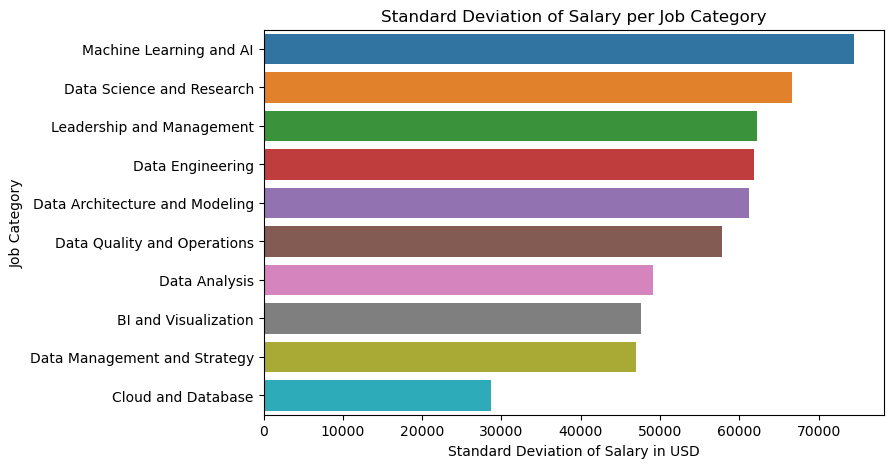

In [8]:
# Compute the standard deviation of salary per job category
std_salary_per_job_category = df.groupby('job_category')['salary_in_usd'].std().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=std_salary_per_job_category, y=std_salary_per_job_category.index)
plt.title("Standard Deviation of Salary per Job Category")
plt.xlabel("Standard Deviation of Salary in USD")
plt.ylabel("Job Category")
plt.show()


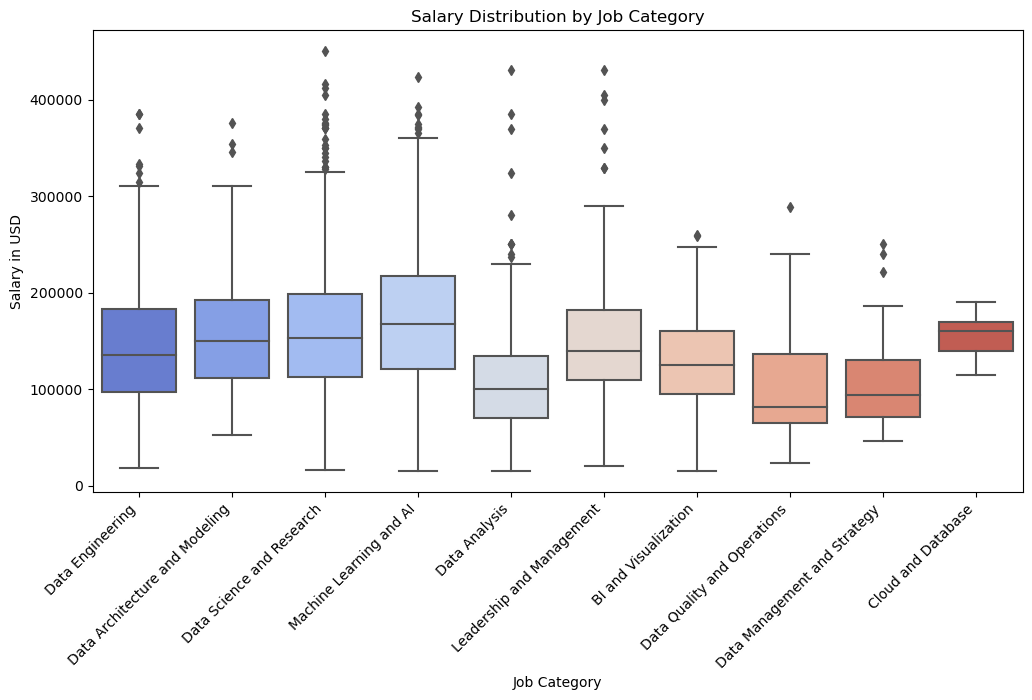

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="job_category", y="salary_in_usd", data=df, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Job Category")
plt.ylabel("Salary in USD")
plt.title("Salary Distribution by Job Category")
plt.show()


### Salary VS Experience level 

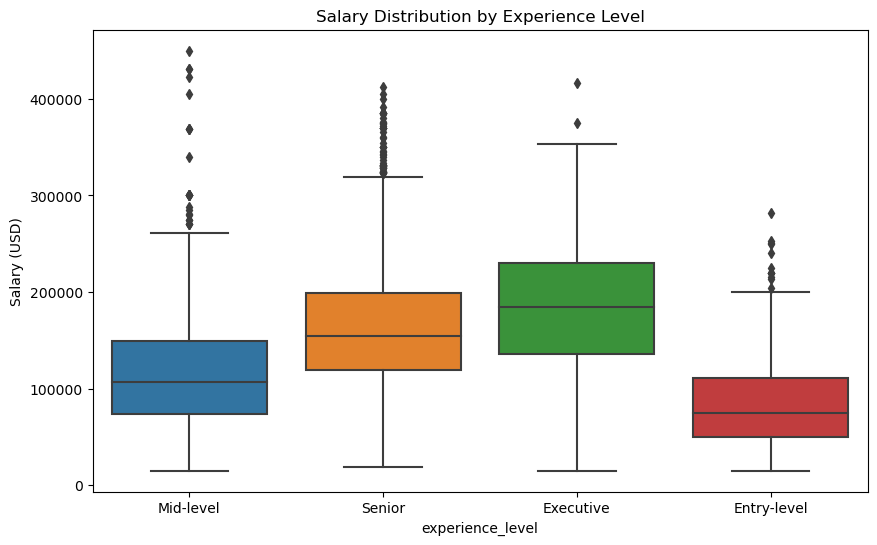

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Experience Level')
plt.ylabel('Salary (USD)')
plt.show()


### Salary VS Company size

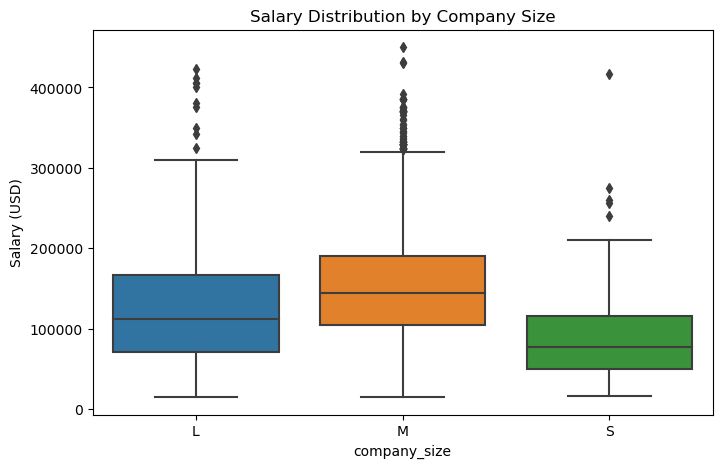

In [12]:
# Boxplot to show salary distribution across company sizes
plt.figure(figsize=(8, 5))
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Company Size')
plt.ylabel('Salary (USD)')
plt.show()
